# Mount the Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Process mining course/10_naive_bayes_assignment')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import the Libraries

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Import the dataset

In [ ]:
df = pd.read_csv(r'Social_Network_Ads_Logistic.csv')

# separate dependent variable
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Splitting the dataset into the trainig set and test set


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # we use the fit_transform method here so we calculate the meand stdev for X_train and scale the data accordingly
X_test_scaled = scaler.transform(X_test) # we call the transform method here so that scaling is consistent across both training and test data

# Training the model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

# Predicting a New Result

In [ ]:
new_sample = np.array([[30,8700]])
new_sample_scaled = scaler.transform(new_sample)
new_prediction = classifier.predict(new_sample_scaled)
print("New sample prediction for independent variables", new_sample, "is:", new_prediction)

New sample prediction for independent variables [[  30 8700]] is: [0]


# Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test_scaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]]


# Make the Confusion Matrix

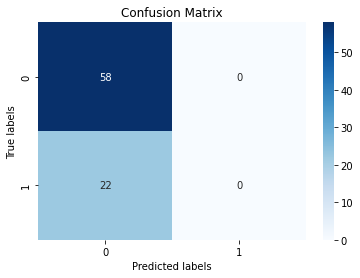

Accuracy: 0.725


In [ ]:
cm =  confusion_matrix(y_test, y_pred)

# display cm as heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Visualize the training set results


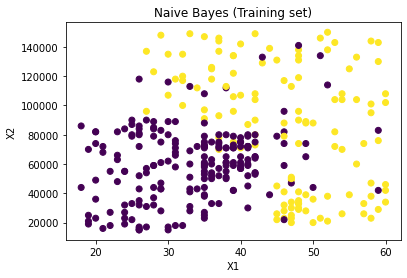

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title('Naive Bayes (Training set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Visualize the test set results

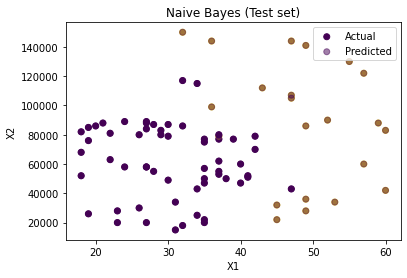

In [ ]:
# Create a scatter plot of the actual test set results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Actual')
# Create a scatter plot of the predicted test set results
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.5, label='Predicted')
plt.title('Naive Bayes (Test set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()